In [26]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
import os

In [71]:
G0 = {}
G1 = {}
G2 = {}
G3 = {}


In [72]:
for i,j,k in os.walk('./_118_/'):
    for i0 in k:
        if 'netB.csv' in i0:
            g = pd.read_csv(i+'/'+i0)
            t0 = G0.get(i.split('/')[-1],[])
            t1 = G1.get(i.split('/')[-1],[])
            t2 = G2.get(i.split('/')[-1],[])
            t3 = G3.get(i.split('/')[-1],[])

            t0 += [g['Pd'].sum()]
            t1 += [g['Pg'].sum()]
            t2 += [g['Renewable'].sum()]
            t3 += [g['USED'].sum()]

            G0[i.split('/')[-1]] = t0
            G1[i.split('/')[-1]] = t1
            G2[i.split('/')[-1]] = t2
            G3[i.split('/')[-1]] = t3


In [73]:
gh1 = []

In [74]:
len(list(G3.keys()))

3

In [75]:
gh = []

In [81]:
j = 0
print(list(G3.keys())[j])
k = np.mean(G3[list(G0.keys())[j]]),np.mean(G0[list(G0.keys())[j]])
print(k)
gh.append(k)

0.1_0.1_118_thbtc_2
(214.4116462024612, 2816.970588235294)


In [82]:
ht = np.array(gh)

In [83]:
ht

array([[   0.        , 1995.60294118],
       [ 221.83972716, 2895.20588235],
       [ 214.4116462 , 2816.97058824]])

In [84]:
ht[:,1] = ht[:,1] - 1995.60294118

In [85]:
ht

array([[ 0.00000000e+00, -3.52952156e-09],
       [ 2.21839727e+02,  8.99602941e+02],
       [ 2.14411646e+02,  8.21367647e+02]])

In [87]:
G0.keys()

dict_keys(['0.1_0.1_118_thbtc_2', '0.1_0.1_118_thdegree_2', '0_0_118_base_2'])

In [88]:
list(G3.keys())

['0.1_0.1_118_thbtc_2', '0.1_0.1_118_thdegree_2', '0_0_118_base_2']

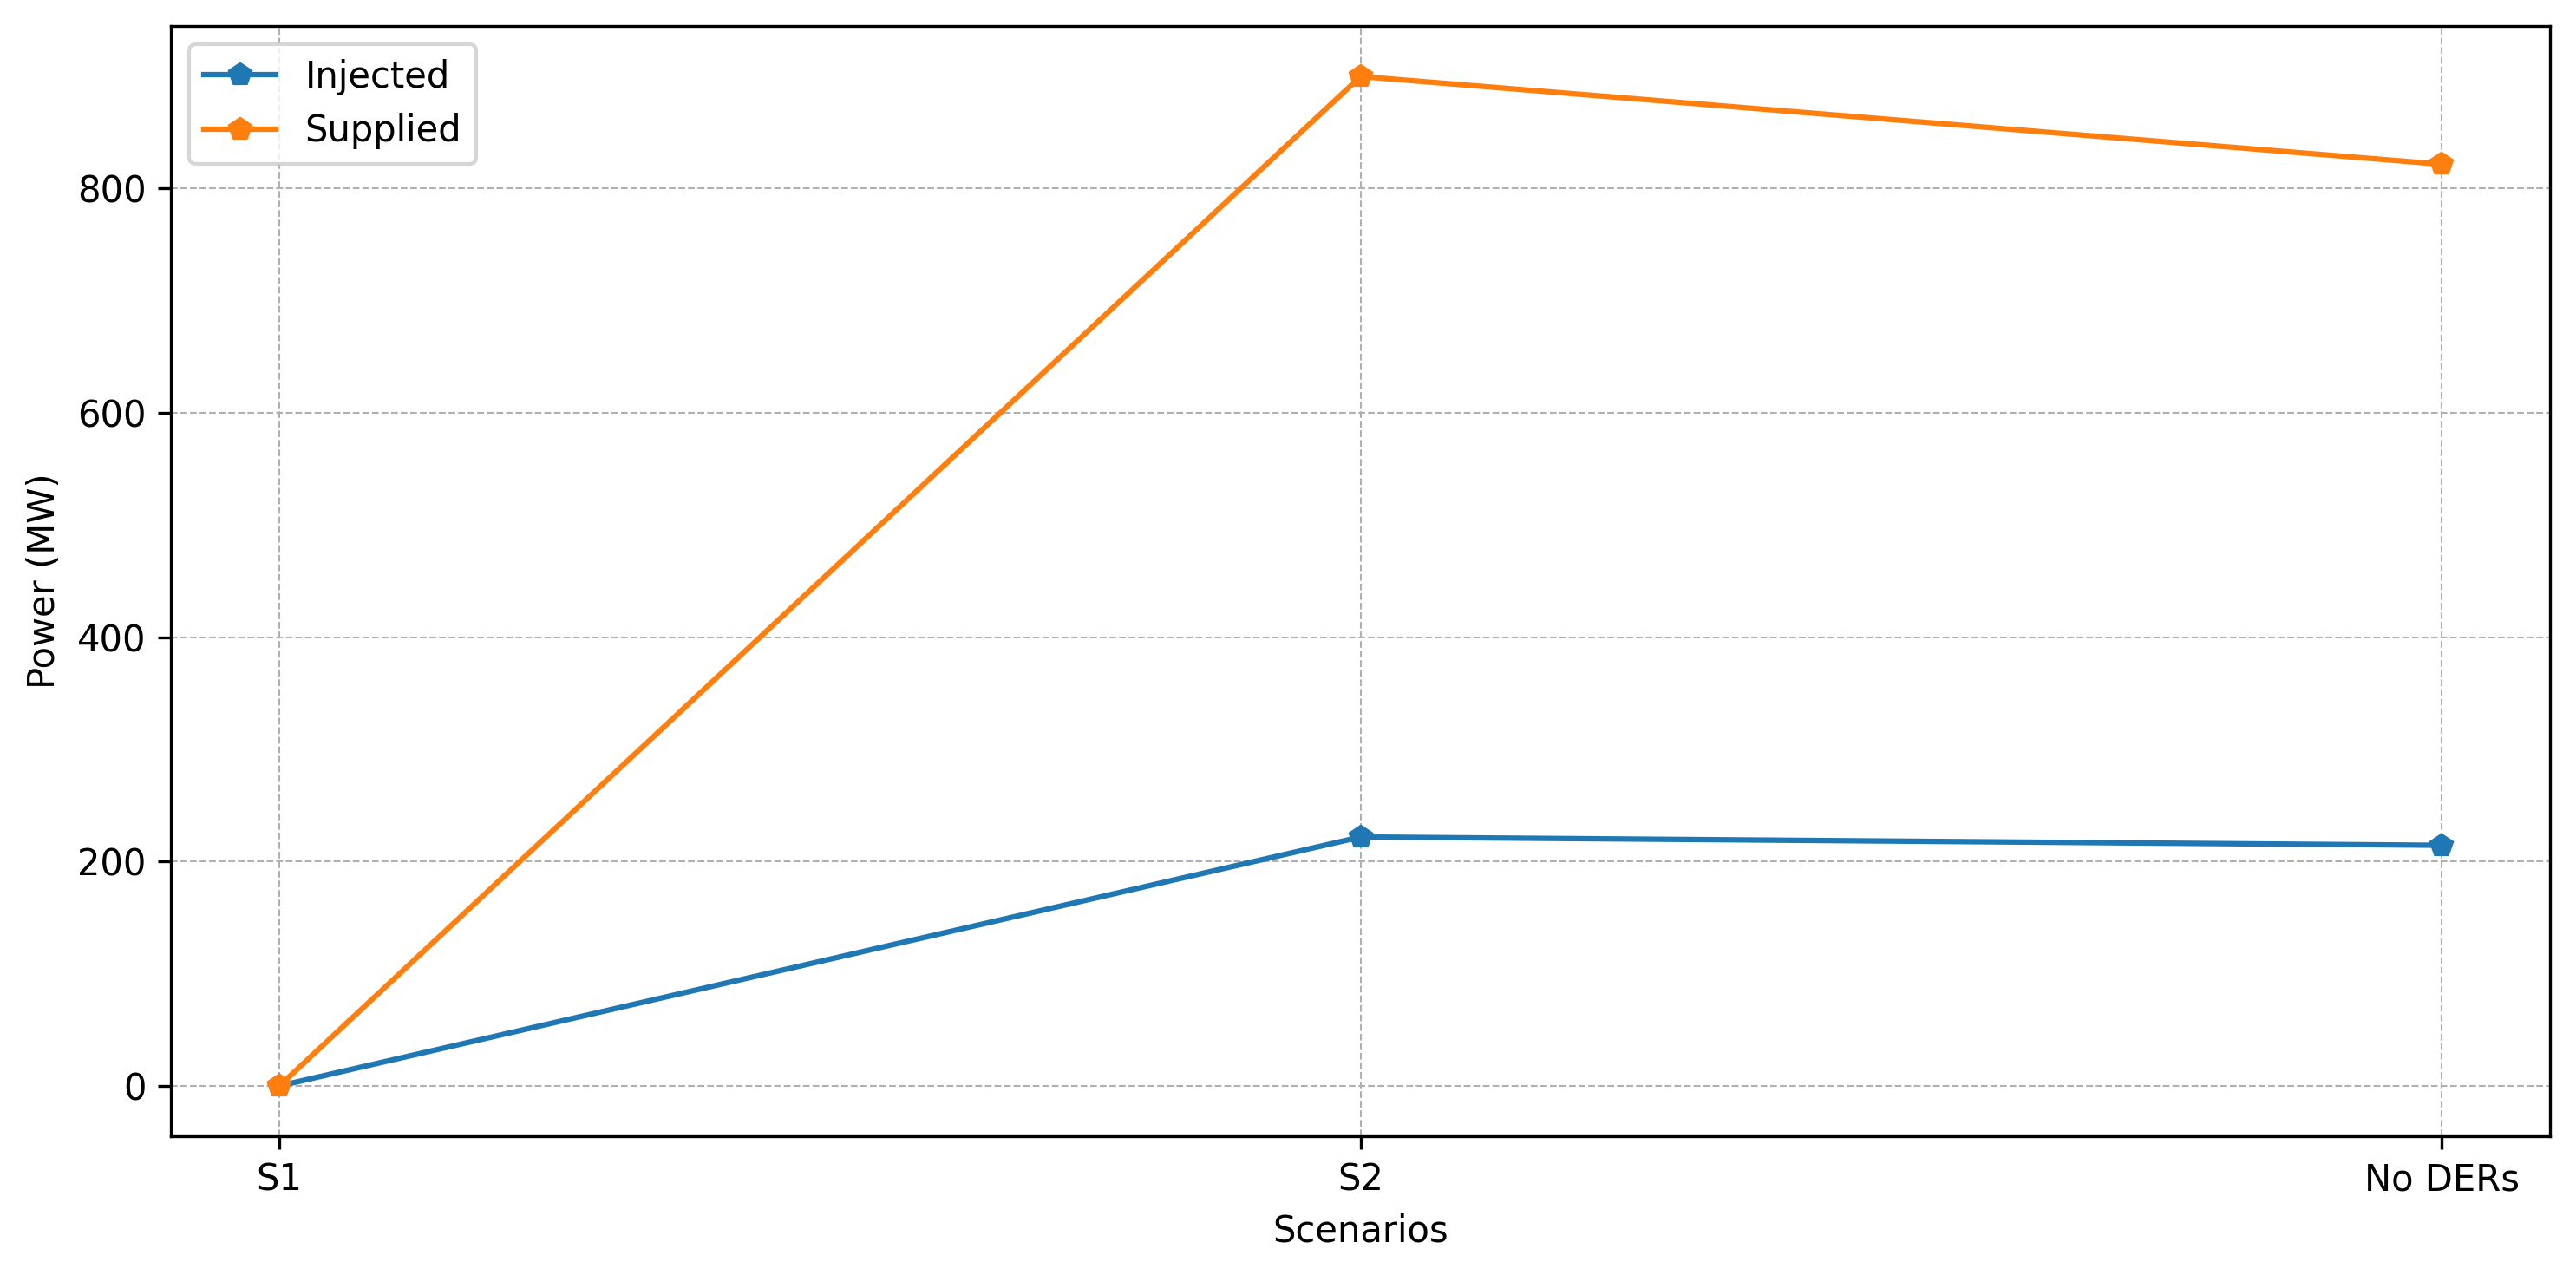

In [89]:
plt.figure(figsize=(10,5),dpi=300)
plt.plot(ht[:,0][0:3],label='Injected',marker='p')
plt.plot(ht[:,1][0:3],label='Supplied',marker='p')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylabel('Power (MW)')
plt.xticks(range(len(list(G3.keys())))[0:3],['S1','S2','No DERs'][0:3]);
plt.xticks(rotation=0);
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xlabel('Scenarios')
plt.tight_layout()



In [90]:
C = {}

In [91]:
for i,j,k in os.walk('_118_/'):
    for i0 in k:
        if 'REAU_1' in i0:
            # print(i+'/'+i0)
            # print(i.split('/')[-1])
            C[i.split('/')[-1]] = i+'/'+i0

In [92]:
C

{'0.1_0.1_118_thbtc_': '_118_/0.1_0.1_118_thbtc_/REAU_17.npy',
 '0.1_0.1_118_thdegree_': '_118_/0.1_0.1_118_thdegree_/REAU_17.npy',
 '0_0_118_base_': '_118_/0_0_118_base_/REAU_17.npy'}

In [95]:

sorted_dict_by_key = dict(sorted(C.items()))

print(sorted_dict_by_key)

{'0.1_0.1_118_thbtc_': '_118_/0.1_0.1_118_thbtc_/REAU_17.npy', '0.1_0.1_118_thdegree_': '_118_/0.1_0.1_118_thdegree_/REAU_17.npy', '0_0_118_base_': '_118_/0_0_118_base_/REAU_17.npy'}


In [127]:
np.load(C['0.1_0.1_118_thbtc_']).shape

(4, 17)

In [129]:
a2 = np.load(C['0.1_0.1_118_thbtc_'])
b2 = np.load(C['0.1_0.1_118_thdegree_'])
c2 = np.load(C['0_0_118_base_'])


In [132]:
(a2 - c2).mean()/4242

0.19362745098039216

In [133]:
(b2 - c2).mean()/4242

0.21207047175305765

In [135]:
(np.mean(a2-c2,1)/(4242)),(np.mean(b2-c2,1)/(4242))

(array([0.04420778, 0.28962476, 0.28215048, 0.15852678]),
 array([0.0608897 , 0.32133844, 0.25474942, 0.21130432]))

In [68]:
trh = 0.4

In [160]:
h = np.linspace(0.05,0.4,8)[0:4]
h

array([0.05, 0.1 , 0.15, 0.2 ])

In [165]:
kl2 = np.zeros((3,4))

for cv in range(4):
    for knd,k in enumerate([a2,b2,c2]):
    # for knd,k in enumerate([a,b,c,c3,c2]):

        kl2[knd][cv] = (((4242 - k[cv])/4242) >= 0.30).sum()/100

In [166]:
kl2

array([[0.01, 0.11, 0.16, 0.15],
       [0.  , 0.05, 0.09, 0.12],
       [0.  , 0.05, 0.09, 0.13]])

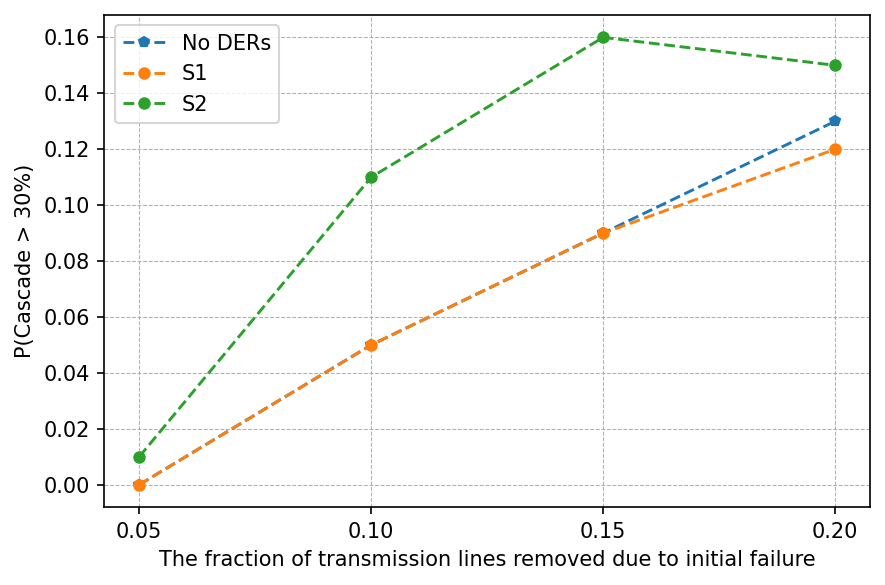

In [167]:
plt.figure(figsize=(6,4),dpi=150)
plt.plot(h,kl2[2].T, linestyle='--',linewidth=1.4, marker='p',markersize=5,label='No DERs')
plt.plot(h,kl2[1].T, linestyle='--',linewidth=1.4, marker='o',markersize=5,label='S1')
plt.plot(h,kl2[0].T, linestyle='--',linewidth=1.4, marker='o',markersize=5,label='S2')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(h);
plt.xlabel('The fraction of transmission lines removed due to initial failure')
plt.ylabel('P(Cascade > 30%)')
# plt.title('$15$% Extra Line Capacity')
        # plt.grid(True)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xticks(h);
plt.tight_layout()
# plt.savefig('baseALL_.png',bbox_inches='tight',dpi=300)


In [156]:
C

{'0.1_0.1_118_thbtc_': '_118_/0.1_0.1_118_thbtc_/REAU_17.npy',
 '0.1_0.1_118_thdegree_': '_118_/0.1_0.1_118_thdegree_/REAU_17.npy',
 '0_0_118_base_': '_118_/0_0_118_base_/REAU_17.npy'}

In [158]:
a2.shape

(4, 17)

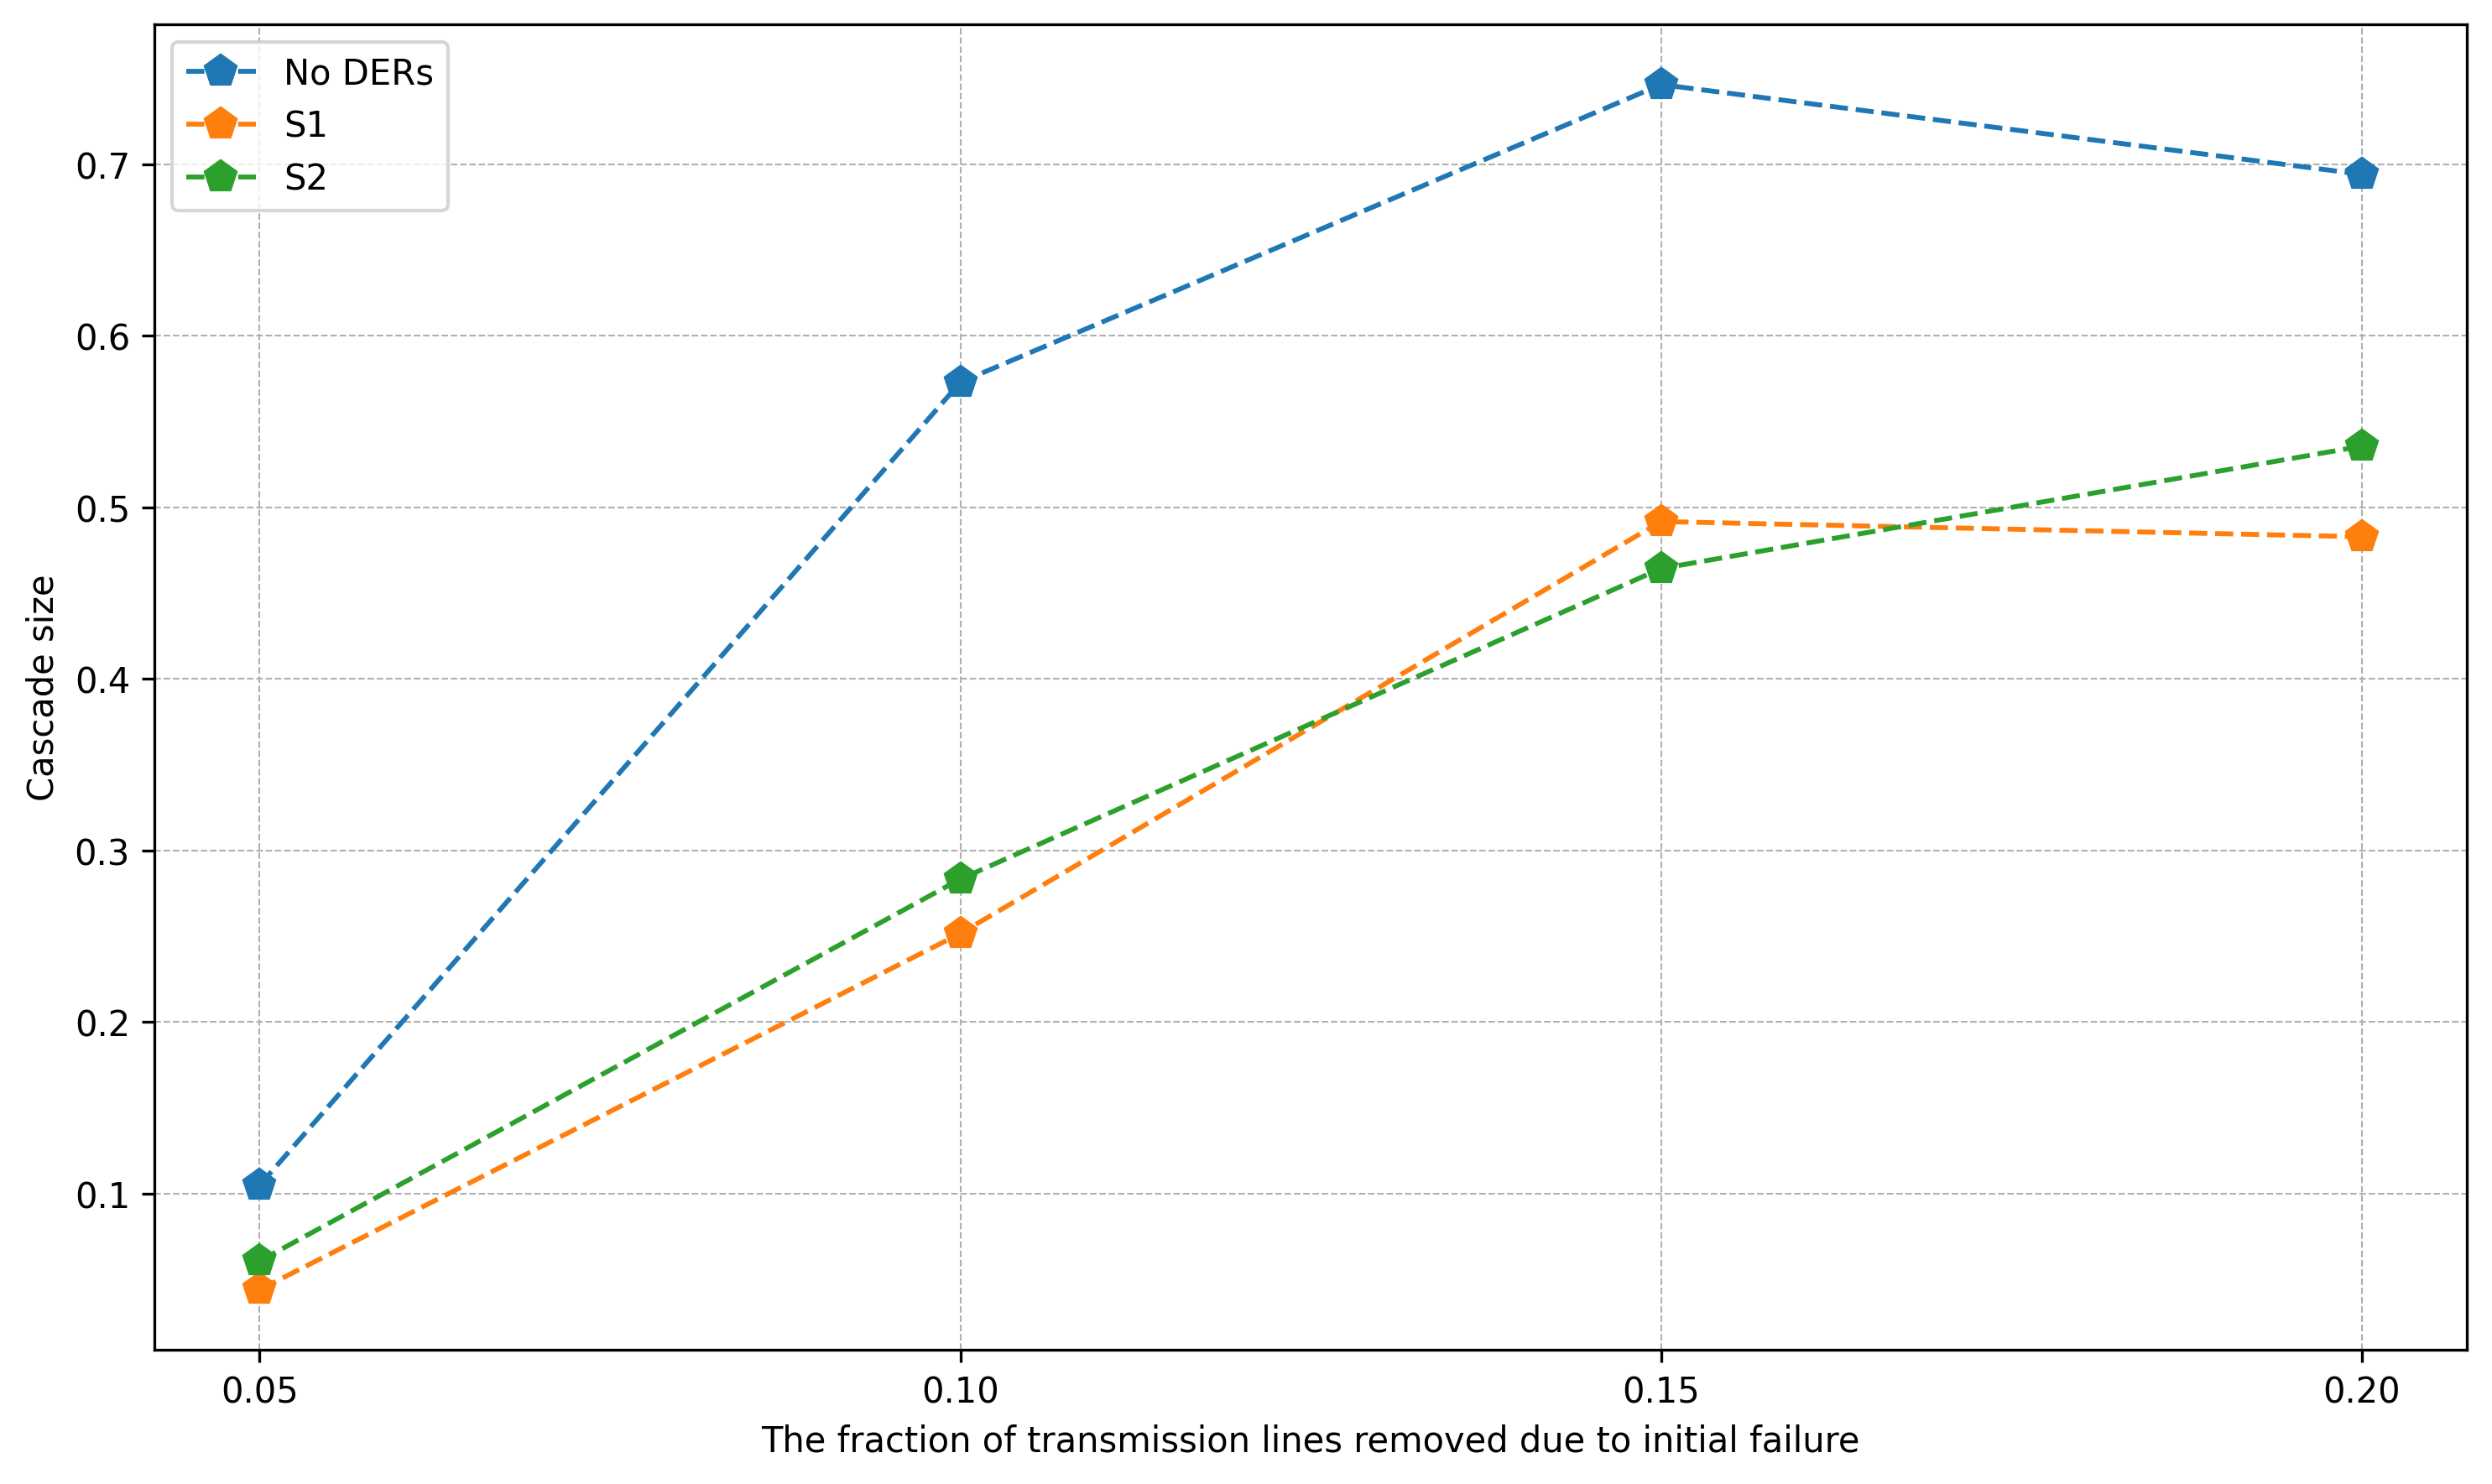

In [168]:
al = 0.4
plt.figure(dpi=300,figsize=(10,6))
a2 = np.load(C['0_0_118_base_']) #No DERs
b2 = np.load(C['0.1_0.1_118_thdegree_']) #S1
c2 = np.load(C['0.1_0.1_118_thbtc_']) #S2

# plt.figure(dpi=200,figsize=(10,6))
plt.plot(h,(4242-a2.mean(1))/4242, linestyle='--',linewidth=1.4, marker='p',markersize=9,label='No DERs')
plt.plot(h,(4242-b2.mean(1))/4242, linestyle='--',linewidth=1.4, marker='p',markersize=9,label='S1')
plt.plot(h,(4242-c2.mean(1))/4242, linestyle='--',linewidth=1.4, marker='p',markersize=9,label='S2')


plt.xlabel('The fraction of transmission lines removed due to initial failure')
plt.ylabel('Cascade size')
# plt.title('$15$% Extra Line Capacity')
        # plt.grid(True)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xticks(h);
plt.tight_layout()
# plt.savefig('ALLDG.png',bbox_inches='tight',dpi=300)